**Data used:**

[https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking)

**Dictionary:**

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

 ### Import

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning dan Preparation

### Data Quality Check

In [281]:
#import data
df = pd.read_csv('/content/drive/MyDrive/marketing-analysis/data/KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [282]:
#data shape
df.shape

(1143, 11)

### Checking features data type.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [284]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())

    print()

ad_id int64
708746 1314415

xyz_campaign_id int64
916 1178

fb_campaign_id int64
103916 179982

age object
['30-34' '35-39' '40-44' '45-49']

gender object
['M' 'F']

interest int64
2 114

Impressions int64
87 3052003

Clicks int64
0 421

Spent float64
0.0 639.9499981

Total_Conversion int64
0 60

Approved_Conversion int64
0 21



### Feature Engineering

#### `age` column

**The `age` column is recoded into four age intervals: '30–34' as 1, '35–39' as 2, '40–44' as 3, and '45–49' as 4.**

In [285]:
age_map = {'30-34': 1, '35-39': 2, '40-44': 3, '45-49': 4}
df['age'] = df['age'].map(age_map)
display(df[['age']].head())

,age
0,1
1,1
2,1
3,1
4,1


#### `Approved_Conversion` column

`Accepted_Conversion` is recoded into a binary column (`Approved_Conversion`), where 0 = no conversion and 1 = at least one conversion.

In [286]:
df['Accepted Conversion'] = (df['Approved_Conversion'] > 0).astype(int)
display(df[['Accepted Conversion']].head())

,Accepted Conversion
0,1
1,0
2,0
3,0
4,1


### Checking duplicate, missing values and outliers.

#### Duplicate

In [288]:
df.duplicated().sum()

np.int64(0)

#### Missing Value

In [289]:
df.isna().sum().sort_values(ascending=False)

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


#### Outliers

In [290]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'Accepted Conversion'],
      dtype='object')

In [291]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['age', 'ad_id','xyz_campaign_id', 'fb_campaign_id'],
               inplace=True)

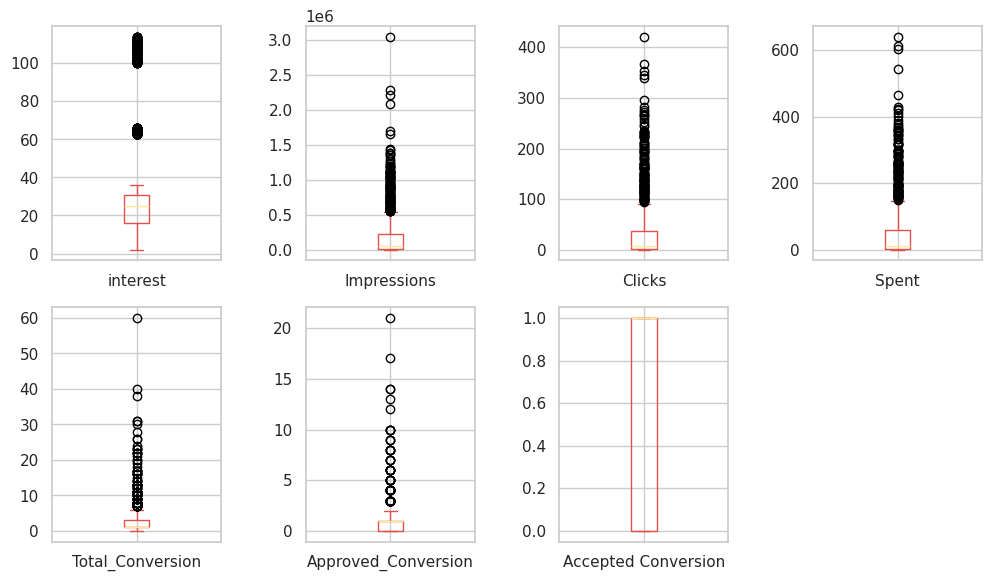

In [292]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

### Checking the distribution of data.

In [293]:
numeric = df_to_plot.columns
numeric

Index(['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'Accepted Conversion'],
      dtype='object')

Text(0.5, 0, 'Gender')

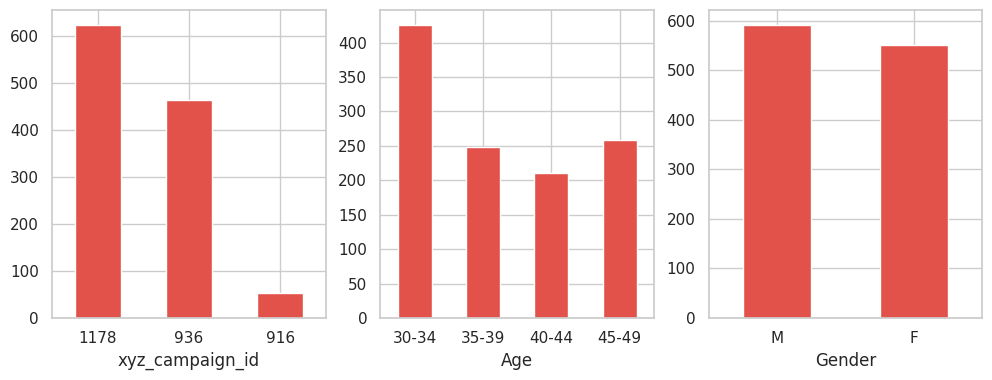

In [294]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
df["xyz_campaign_id"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].tick_params(labelrotation=0)
ax[0].set_xlabel("xyz_campaign_id")

df["age"].value_counts().sort_index().plot(kind="bar", ax=ax[1])
ax[1].tick_params(labelrotation=0)
ax[1].set_xlabel("Age")
ax[1].set_xticklabels(['30-34', '35-39', '40-44', '45-49'])

df["gender"].value_counts().plot(kind="bar", ax=ax[2])
ax[2].tick_params(labelrotation=0)
ax[2].set_xlabel("Gender")

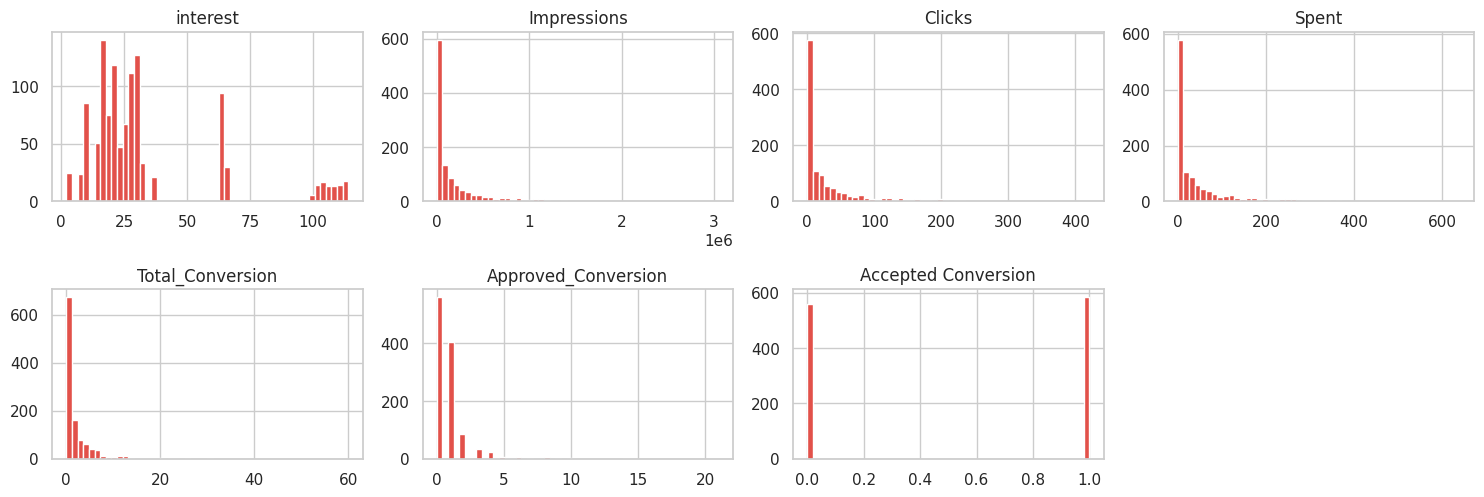

In [295]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

#### Data Insight

In [296]:
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Accepted Conversion
0,708746,916,103916,1,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,1,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,1,M,20,693,0,0.00,1,0,0
3,708815,916,103928,1,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,1,M,28,4133,1,1.29,1,1,1


In [297]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [298]:
df.Total_Conversion.unique()

array([ 2,  1,  4,  3,  0,  5, 28, 13, 11, 24, 60,  7, 40, 26,  6, 20,  9,
       23, 22, 31, 10,  8, 17, 15, 16, 19, 38, 12, 14, 21, 18, 30])

In [299]:
df.Approved_Conversion.unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13])

#### Correlation test

###### interest vs. approved conversion

In [300]:
df["interest"].corr(df['Approved_Conversion'])

np.float64(0.05835320221801987)

* Almost no correlation.
* Suggests that the "interest" variable does not significantly influence conversions.

###### impressions vs. approved conversion

In [301]:
df["Impressions"].corr(df['Approved_Conversion'])

np.float64(0.684248515374351)

* Strong positive correlation.
* More impressions generally lead to more approved conversions.
* Indicates visibility/exposure is a major driver for conversions.

###### clicks vs. approved conversion

In [302]:
df["Clicks"].corr(df['Approved_Conversion'])

np.float64(0.5595257941109979)

* Moderate positive correlation.
* More clicks are associated with more conversions, but weaker than impressions.
* Suggests not every click converts, but it still matters.

###### spent vs. approved conversion

In [303]:
df["Spent"].corr(df['Approved_Conversion'])

np.float64(0.593177815906201)

* Moderate positive correlation.
* Higher ad spend is linked to more conversions, but again, not as strong as impressions.
* Indicates spending helps, but efficiency depends on impressions and click-through rate.

#### `xyz_campaign_id` columns analysis

###### Approved Conversions Vs. Age Groups per Campaign

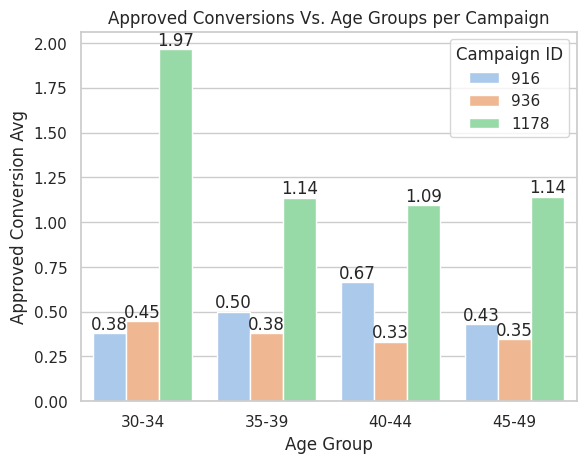

In [304]:
ax = sns.barplot(data=df, x="age", y="Approved_Conversion", hue="xyz_campaign_id",  palette="pastel", errorbar=None)

# Add exact average values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Replace numeric tick labels with age ranges
plt.xticks(
    ticks=[0, 1, 2, 3],  # positions of the bars
    labels=['30-34', '35-39', '40-44', '45-49']  # new labels
)

plt.ylabel("Approved Conversion Avg")
plt.xlabel("Age Group")
plt.legend(title="Campaign ID")
plt.title("Approved Conversions Vs. Age Groups per Campaign")
plt.show()

* Campaign 1178 achieves the highest average conversions.
* Campaign 1178 and 936 peaked at 30-34 age group.
* Campaign 916 peaked at 40-44 age group.
* Age 30–34 is the most responsive segment overall, mainly powered by Campaign 1178.



> Campaign 1178 significantly outperforms the others, especially in the 30–34 age group. Future campaign resources should prioritize this campaign structure, with a focus on younger audiences (30–34).



###### Approved Conversions Vs. Gender per Campaign

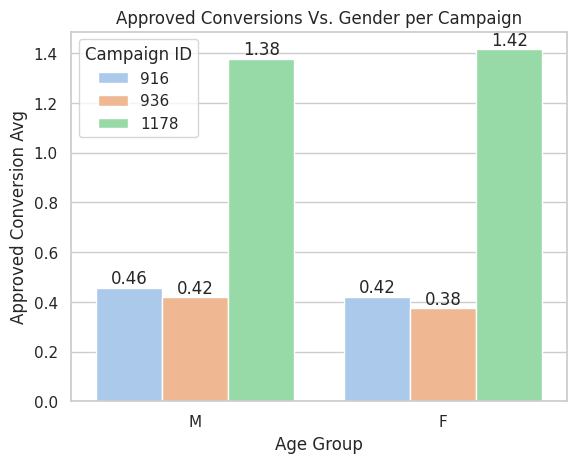

In [305]:
ax = sns.barplot(data=df, x="gender", y="Approved_Conversion", hue="xyz_campaign_id",  palette="pastel", errorbar=None)

# Add exact average values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.ylabel("Approved Conversion Avg")
plt.xlabel("Age Group")
plt.legend(title="Campaign ID")
plt.title("Approved Conversions Vs. Gender per Campaign")
plt.show()

* Across both genders, Campaign 1178 clearly has the highest approved conversion averages. This suggests Campaign 1178 is far more effective compared to Campaigns 916 and 936.
* Campaign 1178 peaked at female customers with 1.42 avg. conversion rate.
* Campaigns 916 and 936 perform similarly in both genders, with average approved conversions below 0.5.
* The average conversion still driven by the campaign itself not gender because how close the average number for each campaign.



> Campaign 1178 is by far the most effective, almost tripling the average conversions compared to the other two. Gender does not play a significant role — campaign choice is the dominant factor.

######  Total Vs. Approved Conversions per Campaign

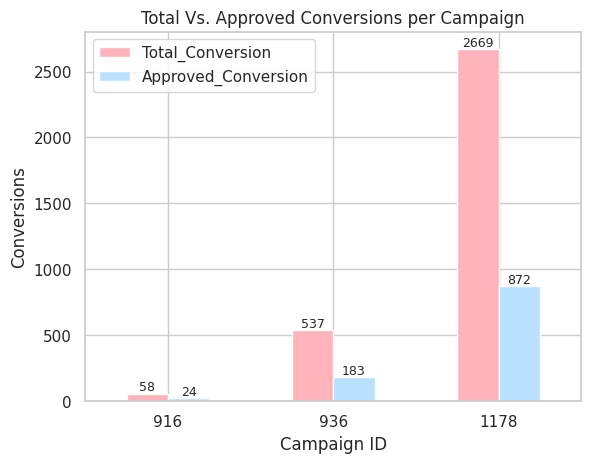

In [306]:
df_group = df.groupby("xyz_campaign_id")[["Total_Conversion","Approved_Conversion"]].sum().reset_index()

ax = df_group.plot(
    x="xyz_campaign_id", kind="bar",
    color=["#FFB3BA", "#BAE1FF"]  # pastel colors
)

plt.tick_params(labelrotation=0)
plt.ylabel("Conversions")
plt.xlabel("Campaign ID")
plt.title("Total Vs. Approved Conversions per Campaign")

# Show the numbers on top of each bar
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0
    )

plt.show()

* Campaign 1178 dominates in both total and approved conversions — it drives most of the business impact.
* Campaign 916 has excellent approval efficiency, but very low volume.
* Campaign 936 is in between, with medium conversions but relatively low approval efficiency.

# Modelling

#### Data Splitting

In [307]:
df = pd.read_csv('/content/drive/MyDrive/marketing-analysis/data/KAG_conversion_data.csv')
df.shape

(1143, 11)

In [308]:
from sklearn.model_selection import train_test_split

In [309]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [310]:
df_train.shape, df_valid.shape, df_test.shape

((685, 11), (229, 11), (229, 11))

In [311]:
685/1143, 229/1143, 229/1143

(0.5993000874890638, 0.20034995625546806, 0.20034995625546806)

In [312]:
display(df_train.head(2))
print()
display(df_valid.head(2))
print()
display(df_test.head(2))

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
21,709323,916,104012,35-39,M,15,7132,2,2.61,1,0
1085,1314349,1178,179916,45-49,M,108,267106,34,50.50,4,1


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1105,1314373,1178,179940,35-39,F,102,245607,33,47.88,3,1
326,778808,936,115912,30-34,M,26,1738,0,0.00,1,0


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
314,778529,936,115866,30-34,M,31,2214,0,0.00,1,0
698,1121437,1178,144596,35-39,M,66,38580,5,8.52,1,0


#### Preprocessing

######  Numeric Preprocessing

In [313]:
df_train['Accepted Conversion'] = (df_train['Approved_Conversion'] > 0).astype(int)
df_valid['Accepted Conversion'] = (df_valid['Approved_Conversion'] > 0).astype(int)
df_test['Accepted Conversion'] = (df_test['Approved_Conversion'] > 0).astype(int)

In [314]:
display(df_train.head(2))
print()
display(df_valid.head(2))
print()
display(df_test.head(2))

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Accepted Conversion
21,709323,916,104012,35-39,M,15,7132,2,2.61,1,0,0
1085,1314349,1178,179916,45-49,M,108,267106,34,50.50,4,1,1


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Accepted Conversion
1105,1314373,1178,179940,35-39,F,102,245607,33,47.88,3,1,1
326,778808,936,115912,30-34,M,26,1738,0,0.00,1,0,0


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Accepted Conversion
314,778529,936,115866,30-34,M,31,2214,0,0.00,1,0,0
698,1121437,1178,144596,35-39,M,66,38580,5,8.52,1,0,0


In [315]:
numeric_feat = ['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion']

In [316]:
display(df_train[numeric_feat].head(2))
display(df_valid[numeric_feat].head(2))
display(df_test[numeric_feat].head(2))

,interest,Impressions,Clicks,Spent,Total_Conversion
21,15,7132,2,2.61,1
1085,108,267106,34,50.50,4


,interest,Impressions,Clicks,Spent,Total_Conversion
1105,102,245607,33,47.88,3
326,26,1738,0,0.00,1


,interest,Impressions,Clicks,Spent,Total_Conversion
314,31,2214,0,0.00,1
698,66,38580,5,8.52,1


######  Categorical Preprocessing

In [317]:
categoric_feat = ['age', 'gender']

In [318]:
all_feat = categoric_feat + numeric_feat

In [319]:
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

In [320]:
age_map = {'30-34': 1, '35-39': 2, '40-44': 3, '45-49': 4}

In [321]:
df_train_final['age'] = df_train_final['age'].map(age_map)
df_valid_final['age'] = df_valid_final['age'].map(age_map)
df_test_final['age'] = df_test_final['age'].map(age_map)

In [322]:
display(df_train_final.head(2))
print()
display(df_valid_final.head(2))
print()
display(df_test_final.head(2))

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
21,2,M,15,7132,2,2.61,1
1085,4,M,108,267106,34,50.50,4


,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
1105,2,F,102,245607,33,47.88,3
326,1,M,26,1738,0,0.00,1


,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
314,1,M,31,2214,0,0.00,1
698,2,M,66,38580,5,8.52,1


In [323]:
from sklearn.feature_extraction import DictVectorizer

In [324]:
dv = DictVectorizer(sparse=False)

In [325]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [326]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [327]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [328]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())

In [329]:
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

In [330]:
display(df_train_final.head(2))
print()
display(df_valid_final.head(2))
print()
display(df_test_final.head(2))

,Clicks,Impressions,Spent,Total_Conversion,age,gender=F,gender=M,interest
0,2.0,7132.0,2.61,1.0,2.0,0.0,1.0,15.0
1,34.0,267106.0,50.50,4.0,4.0,0.0,1.0,108.0


,Clicks,Impressions,Spent,Total_Conversion,age,gender=F,gender=M,interest
0,33.0,245607.0,47.88,3.0,2.0,1.0,0.0,102.0
1,0.0,1738.0,0.00,1.0,1.0,0.0,1.0,26.0


,Clicks,Impressions,Spent,Total_Conversion,age,gender=F,gender=M,interest
0,0.0,2214.0,0.00,1.0,1.0,0.0,1.0,31.0
1,5.0,38580.0,8.52,1.0,2.0,0.0,1.0,66.0


#### Modelling

In [331]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

In [332]:
y_train_final = df_train['Accepted Conversion']
y_valid_final = df_valid['Accepted Conversion']
y_test_final = df_test['Accepted Conversion']

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

######  Logistic Regression

In [334]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [335]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [336]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.668


######  Random Forest

In [337]:
from sklearn.ensemble import RandomForestClassifier

In [338]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [339]:
y_valid_pred = model2.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.629


#### Performance Stability Check

In [340]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [341]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [342]:
y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.727


#### Interpretation

In [343]:
import shap

In [344]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_final)  # modern API

In [345]:
shap_values.values.shape, shap_values.data.shape

((229, 8, 2), (229, 8))

Class 0


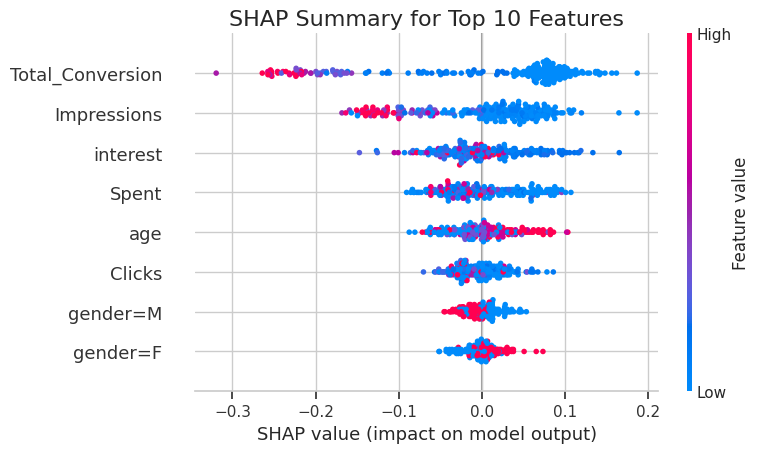

Class 1


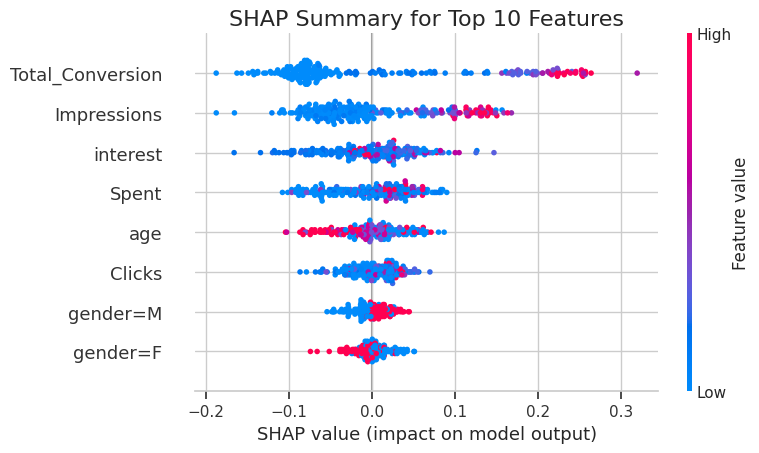

In [346]:
for c in range(shap_values.values.shape[2]):
    print(f"Class {c}")
    plt.title('SHAP Summary for Top 10 Features', size=16)
    shap.summary_plot(shap_values.values[:, :, c], X_test_final)